### SNAP Social Network Graph Analysis

<p>This notebook holds my solution for the final project in <em>Discrete Math and Analyzing Social Graphs</em>, a data science math course from the National Research University Higher School of Economics, offered through Coursera.<p> 

<p>The goal of this short project is to import the networkx python module and use it to analyze a dataset taken from SNAP (Stanford Network Analysis Project) that represents Facebook social media network data, stored in a text file as integer values, graph the data and perform some basic analyses on it. The dataset is anonymized.</p> 

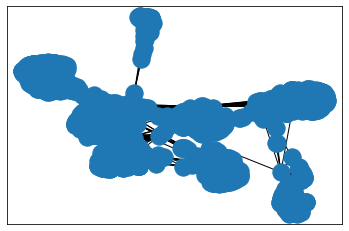

In [1]:
import networkx as nx;
from random import random;

#read data from the dataset and create graph G_fb
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int);
nx.draw_networkx(G_fb, with_labels = False)

<p>When visualized using ".draw_networkx()", the resulting graph is a bit difficult to interpret given how many datapoints have been squeezed into a relatively small space; however, we can still see some very general features of the social network that the graph depicts despite how crowded the graph is. Namely, we can see some clusters despite the contents of the graph being very, very crowded. In the following two code cells, the number of nodes and edges present in the graph are calculated and the totals are printed out.</p>

In [2]:
print("edges = " + str(G_fb.number_of_edges()));

edges = 88234


In [3]:
print("nodes = " + str(G_fb.number_of_nodes()));

nodes = 4039


<p>The first task in this assignment was to calculate the probability of an edge existing between any two, randomly chosen nodes. We can see in the cells above that there are 88,234 edges present within the graph, along with 4,039 nodes. So we already have two of the peices required to obtain the probability of there being an edge between any two random nodes.  In order to find this probability, we need to know the maximum number of possible edges that may exist within the graph and then we need to divide the actual number of edges in the graph by the maximum number of possible edges. Getting the maximum number of possible edges may seem like a difficult task at first glance; however, it is actually a relatively simple combinatorics problem. We know that each edge in a graph connects two nodes, one node on each end of the edge; therefore, if we count all of the ways that 2 nodes can be selected from a pool of 4,039 nodes, nC2, we should also arrive at the total number of possible edges that could exist in the graph. This means our formula should be: n(n-1)/2. We can then take the total number of edges present in the graph and divide it by nC2, where n is the total number of nodes, to get the probability of there being an edge present between any two, randomly chosen nodes. The results are as shown in the code cell below:</p>

In [4]:
#task 1: computing the probability of an endge existing between two vertices
nodes = G_fb.number_of_nodes()
edges = G_fb.number_of_edges()
num_combinations = (nodes * (nodes-1)) / 2
P = edges / num_combinations
edge_probab = P
print(num_combinations)
print(edge_probab)

8154741.0
0.010819963503439287


<p>The second task in this assignment was to calculate the average clustering coefficient (ACC) of the graph, which is the average of the sum of the local clustering coefficients (LCC) for all the nodes. Networkx has a method for this: ".average_clustering()". The results are as shown in the code cell below:</p>

In [5]:
#task 2: calculate the average clustering coefficient(ACC)
G_fb_av_clust_coeff = nx.average_clustering(G_fb)
print(G_fb_av_clust_coeff)

0.6055467186200876


<p>The third task in this assignment was to generate a random graph that will be juxtaposed with the original graph inorder to compare the ACC of the original graph with the ACC of the randomly generated graph. I used the erdos_renyi_graph generator to generate the random graph. This has been done according to the assignment instructions provided on Coursera.</p>

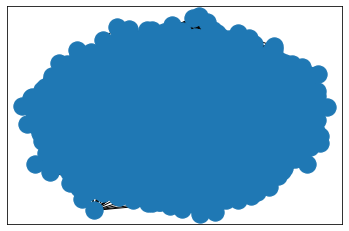

In [6]:
#task 3: generate a random graph and add edges to it using the probability calculated above for graph G_fb.
G_rand = nx.generators.random_graphs.erdos_renyi_graph(nodes, edge_probab, seed = None, directed = False)
nx.draw_networkx(G_rand, with_labels = False)
        

<p>The random graph has the same number of nodes as well as a number of edges comparable to the original graph; however, the random graph is evidently distinct from the original graph. This is because it visibly lacks the clustering that was visible in the original graph.</p>

In [7]:
ran_nodes = G_rand.number_of_nodes()
ran_edges = G_rand.number_of_edges()
print(ran_nodes)
print(ran_edges)

4039
87704


<p>The following two cells were not part of the original assignment. In order to make sure that I properly generated a random graph for task 3, I used an alternate method of generating random graphs to create a second random graph. If both random graphs were similar then I succeeded in completing task 3; whereas, if the two graphs were wildly different, I'd know that something went wrong. As shown below, both graphs are very similar, therefore, I succeeded in completing task 3.</p>

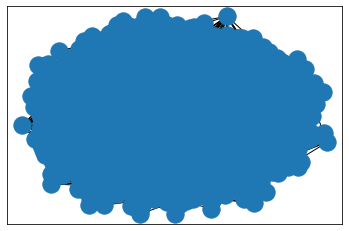

In [8]:
H_ran = nx.gnp_random_graph(4039, edge_probab)
nx.draw_networkx(H_ran, with_labels = False)

In [9]:
H_ran_nodes = H_ran.number_of_nodes()
H_ran_edges = H_ran.number_of_edges()
print(H_ran_nodes)
print(H_ran_edges)

4039
88247


<p>The last step in the assignmet was to print the number of edges and the ACC of graph G_rand. These two values are pinted in the final code cell below.</p>

In [10]:
av_clust_coeff = nx.average_clustering(G_rand)
print("rgraph_edges = " + str(G_rand.number_of_edges()));
print("rgraph_acc = " + str(av_clust_coeff))

rgraph_edges = 87704
rgraph_acc = 0.01062725803908549


<p>Interestingly, the ACC of G_rand (.01) is very close to the probability that was calculated for task 1; whereas the ACC of G_fb was significantly higher (.6).</p>